# 模型表示法

> [Machine Learning | Coursera](https://www.coursera.org/specializations/machine-learning-introduction)
>
> **Abstract**: *线性回归模型是如何在代码中定义的，还可以看到一些图，这些图显示了在选择 w 和 b 的情况下，模型对某些数据的拟合程度*。

## 工具

- `NumPy`: 一个流行的计算科学库

- `Matplotlib`: 一个用于绘制数据的流行库

In [134]:
import numpy as np
import matplotlib.pyplot as plt

# Set the style of the plotting module
plt.style.use('dark_background')

## 问题陈述与数学建模

以我们在回归模型中提到的[回归模型](https://wiki.virtualguard101.com/notes/ml/regression/#%E8%AE%AD%E7%BB%83%E9%9B%86)为例，通过如下代码创建 `x_train` 与 `y_train` 变量:

In [135]:
x_train = np.array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])
"""The input variables (x) are the years
"""

y_train = np.array([82, 70, 75, 77, 78, 77, 79, 80, 83, 84, 85, 88, 90, 75, 80, 78, 76, 77])
"""The output variables (y) are the employment rates of fresh graduates
"""

print(f"x_train: {x_train}")
print(f"y_train: {y_train}")


x_train: [2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020
 2021 2022 2023 2024]
y_train: [82 70 75 77 78 77 79 80 83 84 85 88 90 75 80 78 76 77]


### 样本数量

- 训练样本的数量使用 $m$ 表示:

> `NumPy`数组具有 `.shape` 方法，能够返回一个**元组**，其中包含每个维度的**条目数**。

In [136]:
print(f"x_train.shape: {x_train.shape}")

# 训练样本数量
m = x_train.shape[0]
print(f"Number of training examples: {m}")

x_train.shape: (18,)
Number of training examples: 18


也可以直接使用 `len()` 方法:

In [137]:
m = len(x_train)
print(f"Number of training examples: {m}")

Number of training examples: 18


### 训练样本

可通过数组索引获取第 $i^{th}$ 个训练样本:

> **Wanring**: 注意数组索引从 $0$ 开始

In [138]:
i = 0 
for i in range(m):
    x_i = x_train[i]
    y_i = y_train[i]
    print(f"x^({i}), y^({i}) = ({x_i}, {y_i})")


x^(0), y^(0) = (2007, 82)
x^(1), y^(1) = (2008, 70)
x^(2), y^(2) = (2009, 75)
x^(3), y^(3) = (2010, 77)
x^(4), y^(4) = (2011, 78)
x^(5), y^(5) = (2012, 77)
x^(6), y^(6) = (2013, 79)
x^(7), y^(7) = (2014, 80)
x^(8), y^(8) = (2015, 83)
x^(9), y^(9) = (2016, 84)
x^(10), y^(10) = (2017, 85)
x^(11), y^(11) = (2018, 88)
x^(12), y^(12) = (2019, 90)
x^(13), y^(13) = (2020, 75)
x^(14), y^(14) = (2021, 80)
x^(15), y^(15) = (2022, 78)
x^(16), y^(16) = (2023, 76)
x^(17), y^(17) = (2024, 77)


### 绘制数据

使用 `matplotlib` 中的 `scatter()` 函数进行绘图:

> 参数 `marker` 与 `c` 分别表示样本标记形状与颜色，默认为蓝色圆点

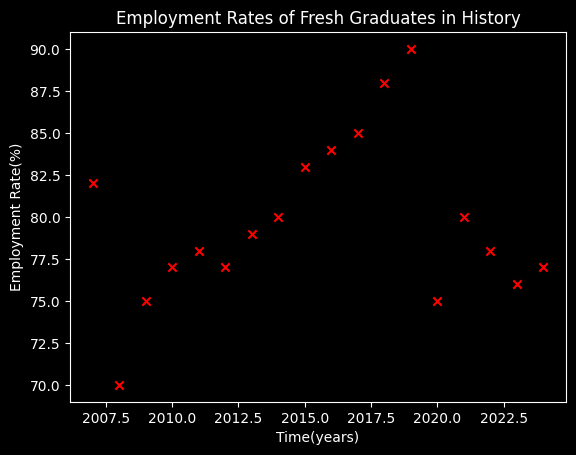

In [139]:
# 绘制数据点
plt.scatter(x_train, y_train, marker='x', c='r')
plt.title("Employment Rates of Fresh Graduates in History")
plt.xlabel("Time(years)")
plt.ylabel("Employment Rate(%)")
plt.show()


## 模型函数

以上面的回归模型为例，为了方便理解，我们先将其近似地看作[一元线性回归模型](https://www.geeksforgeeks.org/python/univariate-linear-regression-in-python/)。

基于先前在[回归模型概述](https://wiki.virtualguard101.com/notes/ml/regression/)中的那幅图，我们不难得出一元线性回归模型的数学函数定义:

$$
f_{w, b}(x^{(i)}) = wx^{(i)} + b
$$

显然，不同的 $w$ 和 $b$ 值会得到不同的直线:

In [140]:
w = 0.6135
b = -1160

print(f"w = {w}")
print(f"b = {b}")


w = 0.6135
b = -1160


通过 `for` 循环计算函数输出:

> - `(ndarray (m,))` 表示一个含有 $m$ 个条目的 **NumPy $n$ 维数组**
>
> - `(scalar)` 表示一个**标量**
>
> - `np.zero(n)` 将返回一个包含 $n$ 条目的 NumPy 一维数组

In [141]:
def compute_model_output(x, w, b) -> np.ndarray:
    """Compute the prediction of a linear model

    Args:
        x (ndarray (m,)): Data, m examples 
        w, b (scalar)    : model parameters  
    Returns
        f_wb (ndarray (m,)): model output
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
    return f_wb


调用这个函数并绘制输出结果:

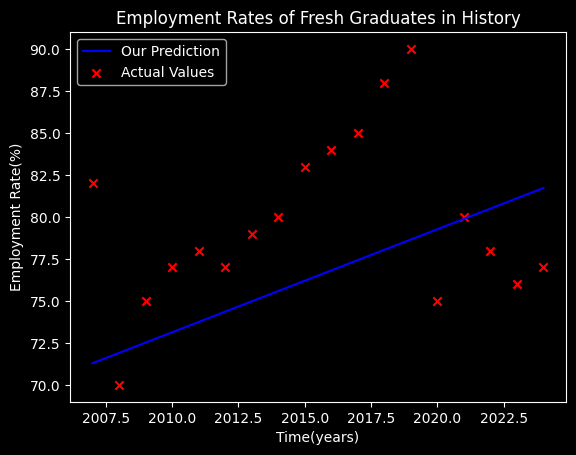

In [142]:
tmp_f_wb = compute_model_output(x_train, w, b)
"""Compute results from linear model
"""

# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Employment Rates of Fresh Graduates in History")
# Set x-axis label
plt.xlabel("Time(years)")
# Set y-axis label
plt.ylabel("Employment Rate(%)")
plt.legend()
plt.show()


这时，就可以开始调整 $w$ 和 $b$ 了。在 Jupyter Notebook 中，我们可以回到当初我们初始化 `w` 与 `b` 的地方，重新设置它们的值并再次运行训练函数，直到能够较好地拟合训练样本。

## 预测

完成调参（训练）后，我们就可以开始将“模型”投入使用了，即使用最合适的**模型参数**代入模型函数，并代入数据进行预测:

In [143]:
model_w = w
model_b = b

x_i = 2025
f_wb = model_w * x_i + model_b

print(f"Predicted employment rate for 2025: {f_wb}%")


Predicted employment rate for 2025: 82.33750000000009%
